# 第1章: 線形回帰モデル

線形関係の目的は1つ、又は複数の特徴量と連続量である目的変数との関係をモデリングすることである。  
同じく教師学習であるクラス分類との違いは、カテゴリ分類よりも連続量である目的変数の予想を行うことである。

## 実装演習結果キャプチャー
https://github.com/syoshinaga/rabbit_challenge/blob/main/capture/machinelearning/skl_regression.ipynb

# 第2章:非線形回帰モデル

回帰関数として基底関数とパラメータベクトルの線形結合を使用する。  
基底関数は多項式やガウス関数等。  
未学習と過学習問題に対して、過学習を低減するために正則化(Ridge, Lasso等)を行う

## 実装演習結果キャプチャー
https://github.com/syoshinaga/rabbit_challenge/blob/main/capture/machinelearning/skl_nonlinear_regression.ipynb


# 第3章:ロジスティック回帰モデル

線形なクラスに有効な、とても簡単に実装できるクラス分類モデル。産業界で広く使われているクラス分類モデルの1つ。  
活性化関数にシグモイド関数を用いることでネット入力zを0〜1に変換し、それを確率として解釈する。  
ネット入力の重みの調整に使うコスト関数には対数尤度関数を使う。

## 実装演習結果キャプチャー
https://github.com/syoshinaga/rabbit_challenge/blob/main/capture/machinelearning/skl_logistic_regression.ipynb

# 第4章:主成分分析

教師なし学習で特徴量の次元削減に使う。  
特徴量抽出の実践観点で言えば、ストレージスペースの削減や計算量の低減だけでなく、次元の呪いを低減することで予想の精度を上げることが可能である。  
基本のアルゴリズムは以下の通り。

1. d次元のデータセットを標準化
2. 分散共分散行列を計算
3. 固有値、固有ベクトルを計算
4. 固有ベクトルをランク付けするために固有値を降順でソート
5. 上位k個の固有値を選択(k<=d)
6. トップのk個の固有ベクトルから射影行列W を構築
7. d次元のインプットデータセットをWによりk次元のデータセットへ変換

カーネル主成分分析により、非線形分類問題を線形分類問題に変換可能である

## 実装演習結果キャプチャー
https://github.com/syoshinaga/rabbit_challenge/blob/main/capture/machinelearning/skl_pca.ipynb

# 第5章:アルゴリズム

## k近傍法

他の教師有り学習より一風変わっている。  
分類関数を学習するのではなく、トレーニングデータを記憶していく感覚である。  
基本的なアルゴリズムは以下の通り。

1. kの値と距離関数を決める
2. 分類したいデータの周りのk個のデータを見つける
3. 多数決により分類したいデータの分類を決める

## k-平均法

産業界やアカデミー界で広く使われているクラスター分類手法の1つ。  
ビジネス指向のアプリケーションで言えば、レコメンドエンジンで文書や音楽や動画の好みを分類するのに使われている。  
基本的なアルゴリズムは以下の通り。

1. 最初のk個の重心をランダムに選ぶ
2. 個々のデータをk個の重心グループの最も近いものに分類する
3. k個の重心を分類されたデータの重心として計算し直す
4. 重心が変わらなくなるか、ユーザーが指定したループ回数上限まで2,3を繰り返す

## 実装演習結果キャプチャー
https://github.com/syoshinaga/rabbit_challenge/blob/main/capture/machinelearning/skl_kmeans.ipynb

# 第7章:サポートベクターマシーン

パーセプトロンが誤分類を最小化するのを目的にするのに対し、サポートベクターマシーンではマージンを最大化するのを目的にする。  
マージンは分類の超平面と、この超平面に最も近いトレーニングサンプルとの距離である。

実装演習(irisデータセットのSVMによる分類)は以下より引用  
Sebastian Raschka, Vahid Mirjalili : Python Machine Learning - Third Edition,  Packt Publishing, 2019


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


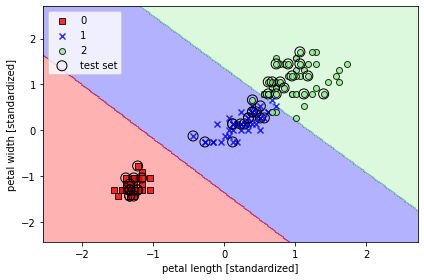

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



# リンク

本記事は以下のオンライン講座のレポートとして作成したものです。

3カ月で現場で潰しが効くディープラーニング講座

https://study-ai.com/jdla/

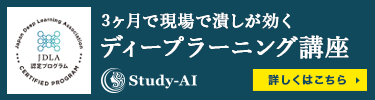